Epoch [100/1000], Loss: 0.4817
Epoch [200/1000], Loss: 0.4786
Epoch [300/1000], Loss: 0.4765
Epoch [400/1000], Loss: 0.4750
Epoch [500/1000], Loss: 0.4741
Epoch [600/1000], Loss: 0.4734
Epoch [700/1000], Loss: 0.4728
Epoch [800/1000], Loss: 0.4725
Epoch [900/1000], Loss: 0.4721
Epoch [1000/1000], Loss: 0.4719


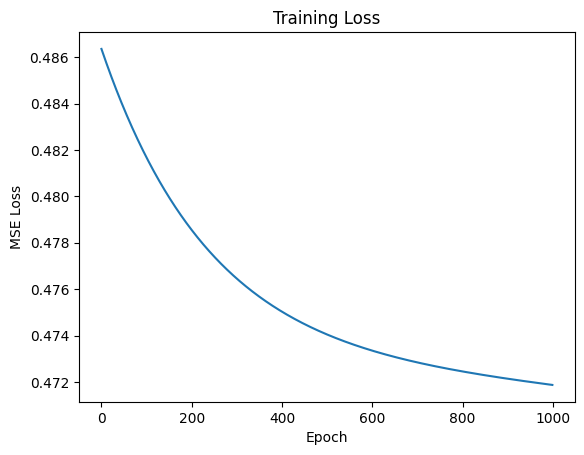

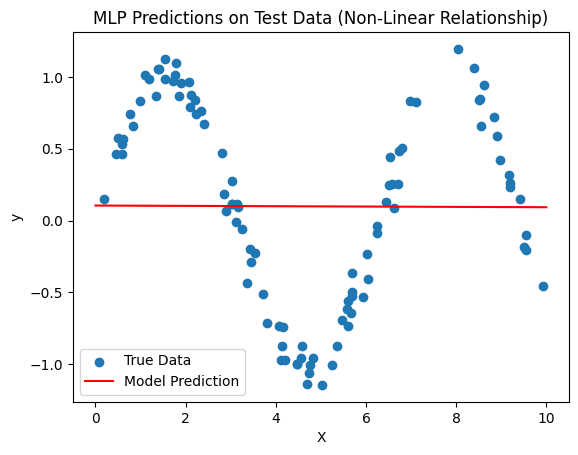

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions for linear algebra operations
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_grad(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]

# Define a simple 2-layer MLP without activation functions
class MLPWithoutActivation:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for layer 1
        self.b1 = np.zeros((1, hidden_size))  # Bias for layer 1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for layer 2
        self.b2 = np.zeros((1, output_size))  # Bias for layer 2
        self.learning_rate = learning_rate
    
    def forward(self, X):
        # Forward pass through the network (no activations)
        self.Z1 = np.dot(X, self.W1) + self.b1  # First layer (hidden layer)
        self.Z2 = np.dot(self.Z1, self.W2) + self.b2  # Second layer (output)
        return self.Z2

    def backward(self, X, y_true, y_pred):
        # Compute the gradients using manual backpropagation
        dZ2 = mse_loss_grad(y_true, y_pred)  # Gradient of loss w.r.t. output
        
        # Gradients for second layer weights and bias
        dW2 = np.dot(self.Z1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        
        # Backpropagate through the first layer
        dZ1 = np.dot(dZ2, self.W2.T)  # dL/dZ1
        
        # Gradients for first layer weights and bias
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        
        # Update the weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, num_epochs=1000):
        losses = []
        for epoch in range(num_epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = mse_loss(y, y_pred)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, y_pred)
            
            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}")
        return losses

# Generate synthetic non-linear data
def generate_nonlinear_data(n_samples=100):
    X = np.random.rand(n_samples, 1) * 10  # Features between 0 and 10
    y = np.sin(X) + 0.1 * np.random.randn(n_samples, 1)  # Non-linear relationship with noise
    return X, y

# Generate training data
X_train, y_train = generate_nonlinear_data()

# Define the MLP model
input_size = 1
hidden_size = 10  # Hidden layer neurons (increase for better approximation)
output_size = 1
learning_rate = 0.001

mlp_model = MLPWithoutActivation(input_size, hidden_size, output_size, learning_rate)

# Train the model
num_epochs = 1000
losses = mlp_model.train(X_train, y_train, num_epochs)

# Plot the loss over time
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Testing the model on some test data
X_test = np.linspace(0, 10, 100).reshape(-1, 1)  # Test inputs
y_test_pred = mlp_model.forward(X_test)

# Plot the predictions vs true values
plt.scatter(X_train, y_train, label="True Data")
plt.plot(X_test, y_test_pred, color='red', label="Model Prediction")
plt.title("MLP Predictions on Test Data (Non-Linear Relationship)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
